In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

import math
# from tensorflow.keras.layers import Convo2D, MaxPooling, Dropout

C:\Users\monica\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_ds, test_ds = dataset['train'], dataset['test']

In [3]:
classes = metadata.features['label'].names
print(f"{classes}")

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
num_train = metadata.splits['train'].num_examples
num_test = metadata.splits['test'].num_examples

# Preprocessing the data 

Normalizing the data to 0-1

In [5]:
def normalize(images,label):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images,label

train_ds =  train_ds.map(normalize)
test_ds  =  test_ds.map(normalize)


Plotting 

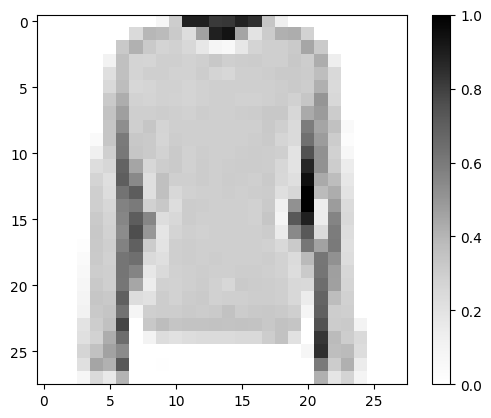

In [6]:
#ColorMaps

#Sequential 
#'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

#Perceptually Uniform Sequential
#viridis, plasma, inferno, magma, cividis

#Sequential2
#binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink', 'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'

#cyclic 
#'twilight', 'twilight_shifted', 'hsv'

for image, label in train_ds.take(1):
  break
image = image.numpy().reshape((28,28))
#converts a tensor object into an numpy.ndarray

# Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.Greys) #Colormap  
plt.colorbar() #Side Range Values
plt.grid(False) #Graph grid
plt.show()

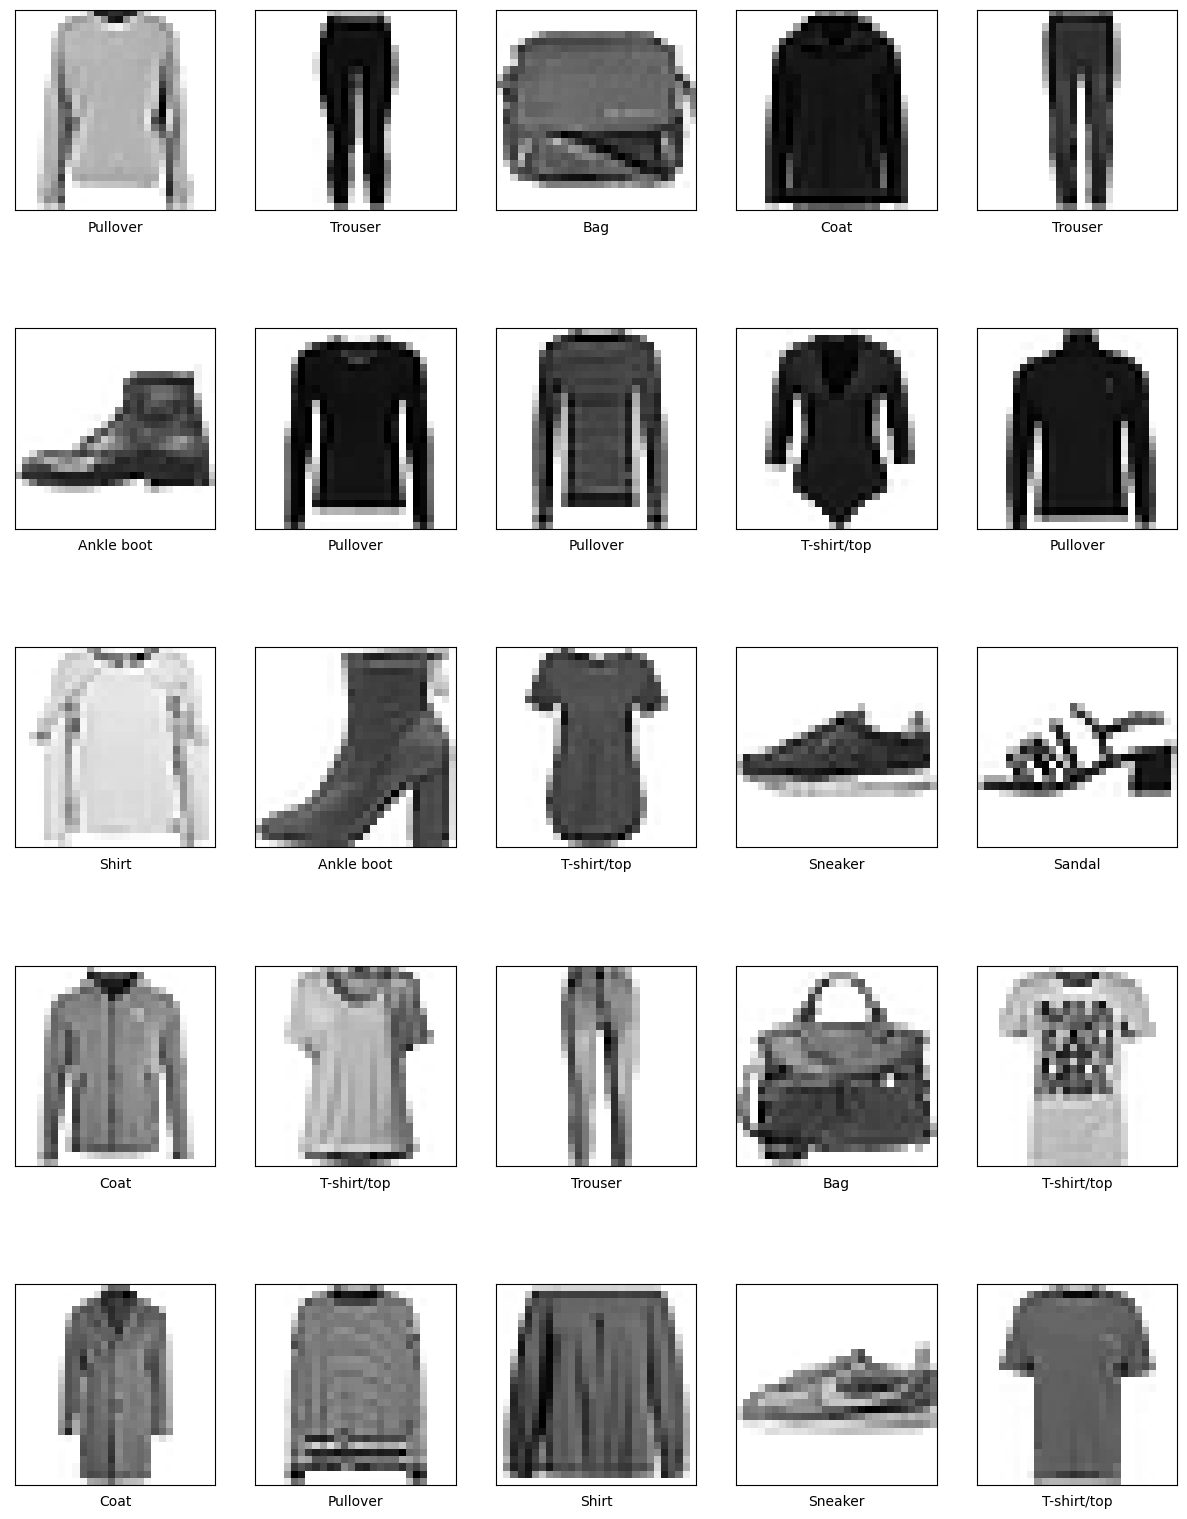

In [7]:
plt.figure(figsize=(15,20))
for i, (image, label) in enumerate(train_ds.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(classes[label])
plt.show()

# Build the Model

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)), # Trandoform into 1d Array
    tf.keras.layers.Dense(128, activation='relu'), #identifying the classes a non linear curve that seperates the classes
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)# Gives the probability
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
BATCH_SIZE = 50
train_ds = train_ds.shuffle(num_train).batch(BATCH_SIZE)
test_ds = test_ds.batch(BATCH_SIZE)

In [11]:
model.fit(train_ds, epochs = 5)

Epoch 1/5


C:\Users\monica\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1200/1200 [==============================] - 74s 57ms/step - loss: 0.4199 - accuracy: 0.8502
Epoch 2/5
1200/1200 [==============================] - 71s 57ms/step - loss: 0.2730 - accuracy: 0.9010
Epoch 3/5
1200/1200 [==============================] - 78s 63ms/step - loss: 0.2293 - accuracy: 0.9148
Epoch 4/5
1200/1200 [==============================] - 72s 57ms/step - loss: 0.1995 - accuracy: 0.9261
Epoch 5/5
1200/1200 [==============================] - 63s 52ms/step - loss: 0.1723 - accuracy: 0.9364


In [12]:
print("Accuracy : ")
model.evaluate(test_ds)[1]

Accuracy : 
200/200 [==============================] - 4s 13ms/step - loss: 0.2321 - accuracy: 0.9181


0.9180999994277954

# Predicting

In [13]:
for image, label in test_ds.take(1):
    break
model_pred1 = model.predict(image)

2/2 [==============================] - 0s 19ms/step


In [14]:
model_pred1[9]

array([9.0814856e-06, 8.7716167e-08, 8.8346824e-03, 1.0154668e-06,
       9.9110305e-01, 9.3535790e-11, 5.0914467e-05, 6.4807193e-10,
       1.1291721e-06, 2.1627609e-09], dtype=float32)

In [16]:
np.argmax(model_pred1[9])

4

In [17]:
label[9]

<tf.Tensor: shape=(), dtype=int64, numpy=4>

In [18]:
def img_plot(i, model_pred, label, image):
    model_pred, label, image = model_pred[i], label[i], image[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(image, cmap=plt.cm.binary)
    
    pred_label = np.argmax(model_pred)
    
    if pred_label == label:
        color = 'green'
    else:
        color = "blue"
        
    plt.xlabel("{} {:1.0f}% ({})".format(classes[pred_label],
                                       100*np.max(model_pred),
                                       classes[label]), 
                color=color)
    
def plot_val(i,model_pred, label):
    model_pred, label = model_pred[i], label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
        
    this_plot = plt.bar(range(10), model_pred, color='#e0d7d8')
    plt.ylim([0,1])
    pred_label = np.argmax(model_pred)
    
    this_plot[pred_label].set_color('green')
    this_plot[label].set_color('blue')
    
    

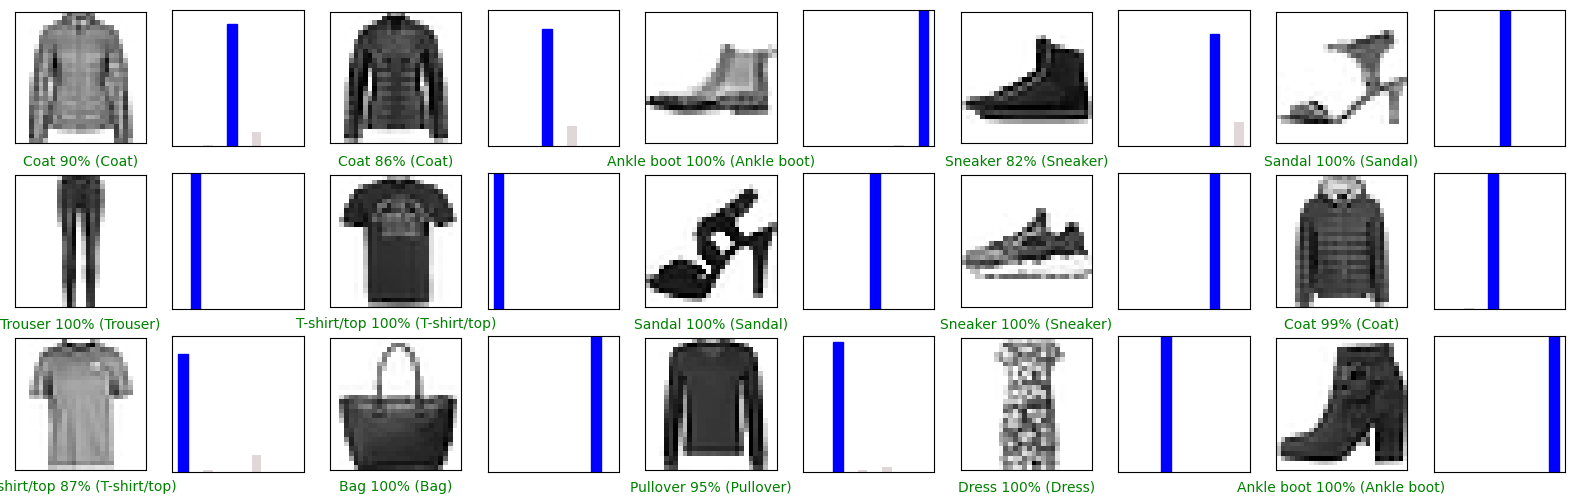

In [20]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 3
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  img_plot(i, model_pred1, label, image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_val(i, model_pred1, label)
